In [2]:
import numpy as np

support_sizes = [512, 1024, 2048, 4096, 8192]

paths_zeroshot_mixed = [
    'outputs_done/support_size/tabforestpfn_zeroshot_512/foundation-default-categorical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_zeroshot_1k/foundation-default-categorical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_zeroshot_2k/foundation-default-categorical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_zeroshot_4k/foundation-default-categorical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_zeroshot_8k/foundation-default-categorical_classification/dataset_plot_combined.npy',
]

paths_zeroshot_numerical = [
    'outputs_done/support_size/tabforestpfn_zeroshot_512/foundation-default-numerical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_zeroshot_1k/foundation-default-numerical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_zeroshot_2k/foundation-default-numerical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_zeroshot_4k/foundation-default-numerical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_zeroshot_8k/foundation-default-numerical_classification/dataset_plot_combined.npy',
]

paths_finetuned_mixed = [
    'outputs_done/support_size/tabforestpfn_finetune_512/foundation-default-categorical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_finetune_1k/foundation-default-categorical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_finetune_2k/foundation-default-categorical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_finetune_4k/foundation-default-categorical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_finetune_8k/foundation-default-categorical_classification/dataset_plot_combined.npy',
]

paths_finetuned_numerical = [
    'outputs_done/support_size/tabforestpfn_finetune_512/foundation-default-numerical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_finetune_1k/foundation-default-numerical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_finetune_2k/foundation-default-numerical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_finetune_4k/foundation-default-numerical_classification/dataset_plot_combined.npy',
    'outputs_done/support_size/tabforestpfn_finetune_8k/foundation-default-numerical_classification/dataset_plot_combined.npy',
]


def get_stats(paths: list[str]) -> tuple[list[float], list[float], list[float]]:
    f_means = []
    f_lows = []
    f_highs = []

    for path in paths:
        data = np.load(path)

        f_means.append(data[0, 7, 0])
        f_lows.append(data[1, 7, 0])
        f_highs.append(data[2, 7, 0])

    return {
        'mean': f_means,
        'low': f_lows,
        'high': f_highs,
    }


stats_zeroshot_mixed = get_stats(paths_zeroshot_mixed)
stats_zeroshot_numerical = get_stats(paths_zeroshot_numerical)
stats_finetuned_mixed = get_stats(paths_finetuned_mixed)
stats_finetuned_numerical = get_stats(paths_finetuned_numerical)

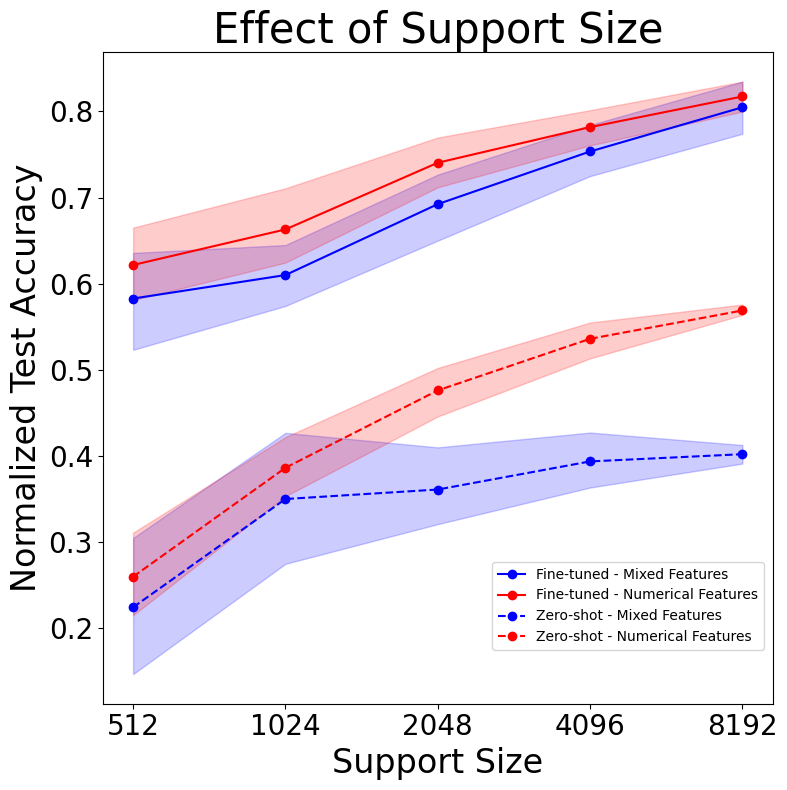

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(8, 8))

lines = []

zeroshot_mixed = ax.plot(support_sizes, stats_zeroshot_mixed['mean'], label='zeroshot_mixed', marker='o', color='blue', linestyle='--')
ax.fill_between(support_sizes, stats_zeroshot_mixed['low'], stats_zeroshot_mixed['high'], alpha=0.2, label='90% CI', color='blue')

zeroshot_numerical = ax.plot(support_sizes, stats_zeroshot_numerical['mean'], label='zeroshot_numerical', marker='o', color='red', linestyle='--')
ax.fill_between(support_sizes, stats_zeroshot_numerical['low'], stats_zeroshot_numerical['high'], alpha=0.2, label='90% CI', color='red')

finetune_mix = ax.plot(support_sizes, stats_finetuned_mixed['mean'], label='finetuned_mixed', marker='o', color='blue')
ax.fill_between(support_sizes, stats_finetuned_mixed['low'], stats_finetuned_mixed['high'], alpha=0.2, label='90% CI', color='blue')

finetune_numerical = ax.plot(support_sizes, stats_finetuned_numerical['mean'], label='finetuned_numerical', marker='o', color='red')
ax.fill_between(support_sizes, stats_finetuned_numerical['low'], stats_finetuned_numerical['high'], alpha=0.2, label='90% CI', color='red')

ax.set_xscale('log')
ax.set_xticks(ticks=support_sizes, minor=False)
ax.set_xticks(ticks=[], minor=True)
ax.get_xaxis().set_major_formatter(mticker.ScalarFormatter())

ax.set_ylabel('Normalized Test Accuracy', fontsize=24)
ax.set_xlabel('Support Size', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_title('Effect of Support Size', fontsize=30)


fig.legend(
    handles=[finetune_mix[0], finetune_numerical[0], zeroshot_mixed[0], zeroshot_numerical[0]],
    labels=['Fine-tuned - Mixed Features', 'Fine-tuned - Numerical Features', 'Zero-shot - Mixed Features', 'Zero-shot - Numerical Features'],
    bbox_to_anchor=(0.97, 0.3),
)
fig.tight_layout()

In [4]:
fig.savefig('tabforestpfn_support_size.pdf')